In [1]:
from IPython.display import display, HTML, clear_output

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 90%; }
    div#maintoolbar-container { width: 90%; }
</style>
"""))

import pandas as pd
import numpy as np
import os
import glob
import sys
import datetime
import json
from pandas.io.json import json_normalize

from datetime import timedelta
from pathlib import Path
import time
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyreadstat

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings. filterwarnings('ignore')

pd.options.display.html.table_schema = True
pd.set_option('display.max_columns', 500)

#alt.renderers.enable('notebook')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

In [4]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

In [6]:
TARGET_CRIME = "crime_category_encoded"

In [7]:
# 'unnamed: 0', 
# 'id',
# 'block', 
# 'case_number', 
# 'name', 
# 'location.human_address'
# 'location.latitude',
# 'location.longitude',
# 'month_num',

# over predictive
# 'primary_type', 
# 'fbi_code', 
# 'iucr', 
# 'description'

In [8]:
# Load data
df = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\Exploratory Data Analysis\input\Dataframes Modified\df_2023_environmental_complaint.csv')

df.columns = df.columns.str.lower()

#df['date'] = pd.to_datetime(df['date'])

# Most predictive variables: primary_type, fbi_code, iucr, description

df = df.drop(['unnamed: 0', 'id', 'block', 'case_number', 'name', 'location.human_address', 'location.latitude', 'location.longitude', 'month_num', 'primary_type', 'fbi_code', 'iucr', 'description', 'arrest', 'domestic', 'updated_on', 'population', 'area(sq mi.)', 'tot_num_environ_complaints'], axis=1)

df

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month,community_name,regional_community,crime_category,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,January,SOUTH CHICAGO,Far Southeast Side,violent_crime,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,January,ENGLEWOOD,Southwest Side,violent_crime,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,January,ROSELAND,Far Southeast Side,violent_crime,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,January,EDGEWATER,Far North Side,property_crime,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,January,NEAR WEST SIDE,West Side,violent_crime,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259298,2023-12-31,APARTMENT,214,2,3.0,38.0,2023,41.821173,-87.615042,11.0,92.0,1.1,0.0,37.94,32.00,34.34,3510 S Michigan Ave,0.580390,Sunday,Weekend,December,GRAND BOULEVARD,South Side,violent_crime,14131.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
259299,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.879292,-87.741397,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,0.952029,Sunday,Weekend,December,AUSTIN,West Side,violent_crime,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259300,2023-12-31,RESIDENCE - PORCH / HALLWAY,1812,18,43.0,7.0,2023,41.920916,-87.642431,5.0,567.0,1.1,0.0,37.94,32.00,34.34,1160 N Larrabee St,0.081456,Sunday,Weekend,December,LINCOLN PARK,North Side,property_crime,22307.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
259301,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.885373,-87.744018,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,1.125653,Sunday,Weekend,December,AUSTIN,West Side,property_crime,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
output = r"C:\Users\croth\Documents\Northwestern University\MSDS 498\Initial Findings\output"

In [10]:
#df = df[df.date == '2023-01-01']

In [11]:
df = df[df.month == 'January']

In [12]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

In [13]:
# Categorized Crimes: 0 = Nonviolent Crimes; 1 = Violent Crimes; 2 = Property Crimes
df['crime_category_encoded'] = df['crime_category'].apply(lambda x: 0 if x in ['nonviolent_crime'] else (1 if x in ['violent_crime'] else 2))

df = df.drop(['crime_category'], axis=1)
df

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month,community_name,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,January,SOUTH CHICAGO,Far Southeast Side,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,January,ROSELAND,Far Southeast Side,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,January,EDGEWATER,Far North Side,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,January,NEAR WEST SIDE,West Side,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,2023-01-31,STREET,712,7,16.0,68.0,2023,41.789901,-87.652336,99.0,87.0,0.0,25.0,14.00,3.02,7.52,1412 S Blue Island Ave\n,0.382933,Tuesday,Weekday,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21056,2023-01-31,STREET,2223,22,21.0,73.0,2023,41.726029,-87.639694,33.0,75.0,0.0,25.0,14.00,3.02,7.52,7808 S Halsted St,0.323412,Tuesday,Weekday,January,WASHINGTON HEIGHTS,Far Southwest Side,8763.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
21057,2023-01-31,VEHICLE NON-COMMERCIAL,922,9,15.0,58.0,2023,41.811395,-87.693078,52.0,77.0,0.0,25.0,14.00,3.02,7.52,2150 N California Ave,0.431175,Tuesday,Weekday,January,BRIGHTON PARK,Southwest Side,16563.60,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
21058,2023-01-31,RESIDENCE - GARAGE,632,6,9.0,44.0,2023,41.733814,-87.611099,109.0,93.0,0.0,25.0,14.00,3.02,7.52,7040 S Cottage Grove Ave,0.383236,Tuesday,Weekday,January,CHATHAM,Far Southeast Side,10749.15,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [14]:
df.crime_category_encoded.value_counts()

2    10238
1     7651
0     3171
Name: crime_category_encoded, dtype: int64

In [15]:
# Create a variable for the dataframe data types
dt = df.dtypes

In [16]:
# Create separate lists for categorical and numerical variables
objectList = []
numList = []

In [17]:
for i in dt.index:
    if i in ( [ TARGET_CRIME ] ) : continue
    if dt[i] in (["object","bool"]) : objectList.append(i)
    if dt[i] in (["float64","int64","int32"]) : numList.append(i)

In [18]:
objectList

['date',
 'location_description',
 'closest_station',
 'dow',
 'daytype',
 'month',
 'community_name',
 'regional_community']

In [19]:
numList

['beat',
 'district',
 'ward',
 'community_area',
 'year',
 'latitude',
 'longitude',
 'total_offenders_in_ca',
 'total_complaints_in_ca',
 'prcp',
 'snow',
 'tempmax_f',
 'tempmin_f',
 'tempavg_f',
 'closest_station_distance',
 'density (/sq mi.)',
 'clean and green program request',
 'lead inspection request',
 'sewer cave-in inspection request',
 'sewer cleaning inspection request',
 'snow - object/dibs removal request',
 'snow removal - protected bike lane or bridge sidewalk',
 'snow – uncleared sidewalk complaint',
 'tree debris clean-up request',
 'tree emergency',
 'tree planting request',
 'tree removal request',
 'tree trim request (no longer being accepted)',
 'water lead test kit request',
 'water lead test visit request',
 'water quality concern',
 'extreme weather notification',
 'ice and snow removal request',
 'low water pressure complaint']

In [20]:
# Convert Categorical Variables into Numerical Variables
object_list = []
dt = df.dtypes
df_dummy = df.copy()

for i in dt.index :
    if i in ( [ TARGET_CRIME ] ) : continue
    if dt[i] in (["object","bool"]) : object_list.append( i )
    
for i in object_list :
    thePrefix = "z_" + i
    y = pd.get_dummies( df_dummy[i], prefix=thePrefix )   
    df_dummy = pd.concat( [df_dummy, y], axis=1 )
    df_dummy = df_dummy.drop( i, axis=1 )

In [21]:
df_dummy

,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station_distance,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded,z_date_2023-01-01,z_date_2023-01-02,z_date_2023-01-03,z_date_2023-01-04,z_date_2023-01-05,z_date_2023-01-06,z_date_2023-01-07,z_date_2023-01-08,z_date_2023-01-09,z_date_2023-01-10,z_date_2023-01-11,z_date_2023-01-12,z_date_2023-01-13,z_date_2023-01-14,z_date_2023-01-15,z_date_2023-01-16,z_date_2023-01-17,z_date_2023-01-18,z_date_2023-01-19,z_date_2023-01-20,z_date_2023-01-21,z_date_2023-01-22,z_date_2023-01-23,z_date_2023-01-24,z_date_2023-01-25,z_date_2023-01-26,z_date_2023-01-27,z_date_2023-01-28,z_date_2023-01-29,z_date_2023-01-30,z_date_2023-01-31,z_location_description_-99,z_location_description_ABANDONED BUILDING,z_location_description_AIRCRAFT,z_location_description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,z_location_description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,z_location_description_AIRPORT EXTERIOR - NON-SECURE AREA,z_location_description_AIRPORT EXTERIOR - SECURE AREA,z_location_description_AIRPORT PARKING LOT,z_location_description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,z_location_description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,z_location_description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,z_location_description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,z_location_description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,z_location_description_AIRPORT TRANSPORTATION SYSTEM (ATS),z_location_description_ALLEY,z_location_description_ANIMAL HOSPITAL,z_location_description_APARTMENT,z_location_description_APPLIANCE STORE,z_location_description_ATHLETIC CLUB,z_location_description_ATM (AUTOMATIC TELLER MACHINE),z_location_description_AUTO,z_location_description_AUTO / BOAT / RV DEALERSHIP,z_location_description_BANK,z_location_description_BAR OR TAVERN,z_location_description_BARBERSHOP,z_location_description_BOWLING ALLEY,z_location_description_CAR WASH,z_location_description_CEMETARY,z_location_description_CHA APARTMENT,z_location_description_CHA HALLWAY / STAIRWELL / ELEVATOR,z_location_description_CHA PARKING LOT / GROUNDS,z_location_description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP,z_location_description_CLEANING STORE,z_location_description_COIN OPERATED MACHINE,z_location_description_COLLEGE / UNIVERSITY - GROUNDS,z_location_description_COLLEGE / UNIVERSITY - RESIDENCE HALL,z_location_description_COMMERCIAL / BUSINESS OFFICE,z_location_description_CONSTRUCTION SITE,z_location_description_CONVENIENCE STORE,z_location_description_CREDIT UNION,z_location_description_CTA BUS,z_location_description_CTA BUS STOP,z_location_description_CTA PARKING LOT / GARAGE / OTHER PROPERTY,z_location_description_CTA PLATFORM,z_location_description_CTA STATION,z_location_description_CTA TRACKS - RIGHT OF WAY,z_location_description_CTA TRAIN,z_location_description_CURRENCY EXCHANGE,z_location_description_DAY CARE CENTER,z_location_description_DEPARTMENT STORE,z_location_description_DRIVEWAY - RESIDENTIAL,z_location_description_DRUG STORE,z_location_description_FACTORY / MANUFACTURING BUILDING,z_location_description_FEDERAL BUILDING,z_location_description_FIRE STATION,z_location_description_GAS STATION,z_location_description_GAS STATION DRIVE/PROP.,z_location_description_GOVERNMENT BUILDING / PROPERTY,z_location_description_GROCERY FOOD STORE,z_location_des

In [22]:
df_dummy.shape

(21060, 291)

In [23]:
df

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month,community_name,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,January,SOUTH CHICAGO,Far Southeast Side,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,January,ROSELAND,Far Southeast Side,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,January,EDGEWATER,Far North Side,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,January,NEAR WEST SIDE,West Side,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,2023-01-31,STREET,712,7,16.0,68.0,2023,41.789901,-87.652336,99.0,87.0,0.0,25.0,14.00,3.02,7.52,1412 S Blue Island Ave\n,0.382933,Tuesday,Weekday,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21056,2023-01-31,STREET,2223,22,21.0,73.0,2023,41.726029,-87.639694,33.0,75.0,0.0,25.0,14.00,3.02,7.52,7808 S Halsted St,0.323412,Tuesday,Weekday,January,WASHINGTON HEIGHTS,Far Southwest Side,8763.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
21057,2023-01-31,VEHICLE NON-COMMERCIAL,922,9,15.0,58.0,2023,41.811395,-87.693078,52.0,77.0,0.0,25.0,14.00,3.02,7.52,2150 N California Ave,0.431175,Tuesday,Weekday,January,BRIGHTON PARK,Southwest Side,16563.60,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
21058,2023-01-31,RESIDENCE - GARAGE,632,6,9.0,44.0,2023,41.733814,-87.611099,109.0,93.0,0.0,25.0,14.00,3.02,7.52,7040 S Cottage Grove Ave,0.383236,Tuesday,Weekday,January,CHATHAM,Far Southeast Side,10749.15,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


### Scale the Data

In [24]:
### MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dummy)

In [25]:
df_mm = pd.DataFrame(df_scaled)
df_mm.columns = df_dummy.columns
df_mm

,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station_distance,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded,z_date_2023-01-01,z_date_2023-01-02,z_date_2023-01-03,z_date_2023-01-04,z_date_2023-01-05,z_date_2023-01-06,z_date_2023-01-07,z_date_2023-01-08,z_date_2023-01-09,z_date_2023-01-10,z_date_2023-01-11,z_date_2023-01-12,z_date_2023-01-13,z_date_2023-01-14,z_date_2023-01-15,z_date_2023-01-16,z_date_2023-01-17,z_date_2023-01-18,z_date_2023-01-19,z_date_2023-01-20,z_date_2023-01-21,z_date_2023-01-22,z_date_2023-01-23,z_date_2023-01-24,z_date_2023-01-25,z_date_2023-01-26,z_date_2023-01-27,z_date_2023-01-28,z_date_2023-01-29,z_date_2023-01-30,z_date_2023-01-31,z_location_description_-99,z_location_description_ABANDONED BUILDING,z_location_description_AIRCRAFT,z_location_description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,z_location_description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,z_location_description_AIRPORT EXTERIOR - NON-SECURE AREA,z_location_description_AIRPORT EXTERIOR - SECURE AREA,z_location_description_AIRPORT PARKING LOT,z_location_description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,z_location_description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,z_location_description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,z_location_description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,z_location_description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,z_location_description_AIRPORT TRANSPORTATION SYSTEM (ATS),z_location_description_ALLEY,z_location_description_ANIMAL HOSPITAL,z_location_description_APARTMENT,z_location_description_APPLIANCE STORE,z_location_description_ATHLETIC CLUB,z_location_description_ATM (AUTOMATIC TELLER MACHINE),z_location_description_AUTO,z_location_description_AUTO / BOAT / RV DEALERSHIP,z_location_description_BANK,z_location_description_BAR OR TAVERN,z_location_description_BARBERSHOP,z_location_description_BOWLING ALLEY,z_location_description_CAR WASH,z_location_description_CEMETARY,z_location_description_CHA APARTMENT,z_location_description_CHA HALLWAY / STAIRWELL / ELEVATOR,z_location_description_CHA PARKING LOT / GROUNDS,z_location_description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP,z_location_description_CLEANING STORE,z_location_description_COIN OPERATED MACHINE,z_location_description_COLLEGE / UNIVERSITY - GROUNDS,z_location_description_COLLEGE / UNIVERSITY - RESIDENCE HALL,z_location_description_COMMERCIAL / BUSINESS OFFICE,z_location_description_CONSTRUCTION SITE,z_location_description_CONVENIENCE STORE,z_location_description_CREDIT UNION,z_location_description_CTA BUS,z_location_description_CTA BUS STOP,z_location_description_CTA PARKING LOT / GARAGE / OTHER PROPERTY,z_location_description_CTA PLATFORM,z_location_description_CTA STATION,z_location_description_CTA TRACKS - RIGHT OF WAY,z_location_description_CTA TRAIN,z_location_description_CURRENCY EXCHANGE,z_location_description_DAY CARE CENTER,z_location_description_DEPARTMENT STORE,z_location_description_DRIVEWAY - RESIDENTIAL,z_location_description_DRUG STORE,z_location_description_FACTORY / MANUFACTURING BUILDING,z_location_description_FEDERAL BUILDING,z_location_description_FIRE STATION,z_location_description_GAS STATION,z_location_description_GAS STATION DRIVE/PROP.,z_location_description_GOVERNMENT BUILDING / PROPERTY,z_location_description_GROCERY FOOD STORE,z_location_des

### t-SNE Analysis

In [26]:
from sklearn.manifold import TSNE

In [27]:
# # Using minmax scaled data
# z = TSNE(n_components=2, perplexity=100, verbose=0, n_iter=1000, learning_rate=100).fit_transform(df_mm) 

In [28]:
# plt.figure(figsize=(10, 10))
# df_tsne = pd.DataFrame()
# df_tsne["y"] = df['crime_category_encoded']
# df_tsne["comp-1"] = z[:,0]
# df_tsne["comp-2"] = z[:,1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
#                 palette=sns.color_palette("hls", 3),
#                 data=df_tsne)

### Hierarchical Clustering

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

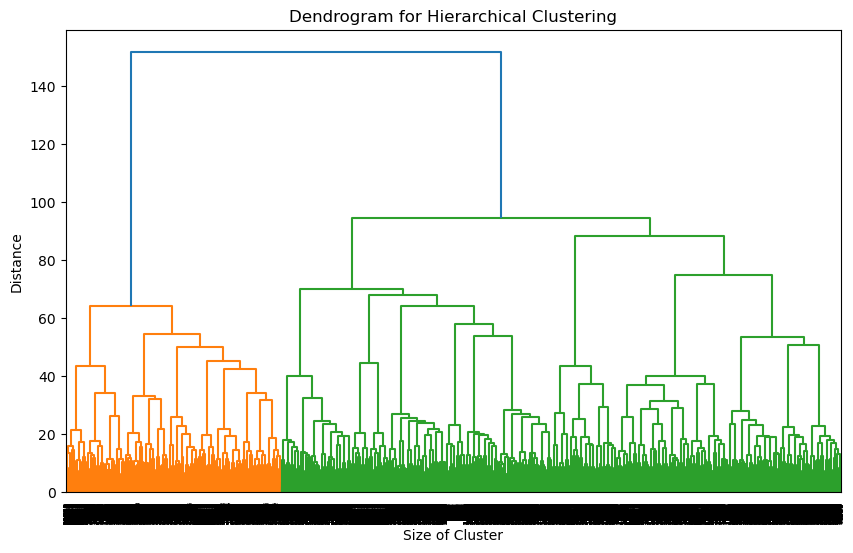

In [30]:
# Look at dendrogram with ward linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'ward'), p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

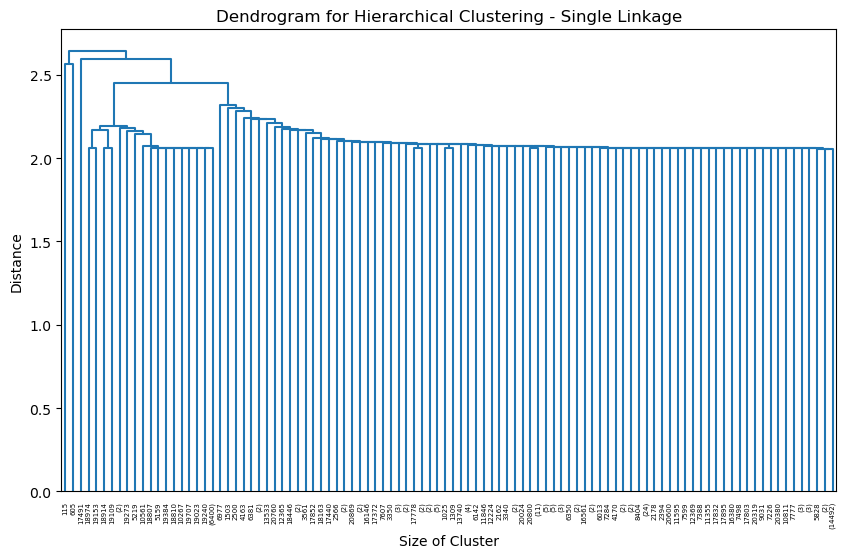

In [31]:
# Look at dendrogram with single linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'single'), truncate_mode = 'lastp', p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering - Single Linkage')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

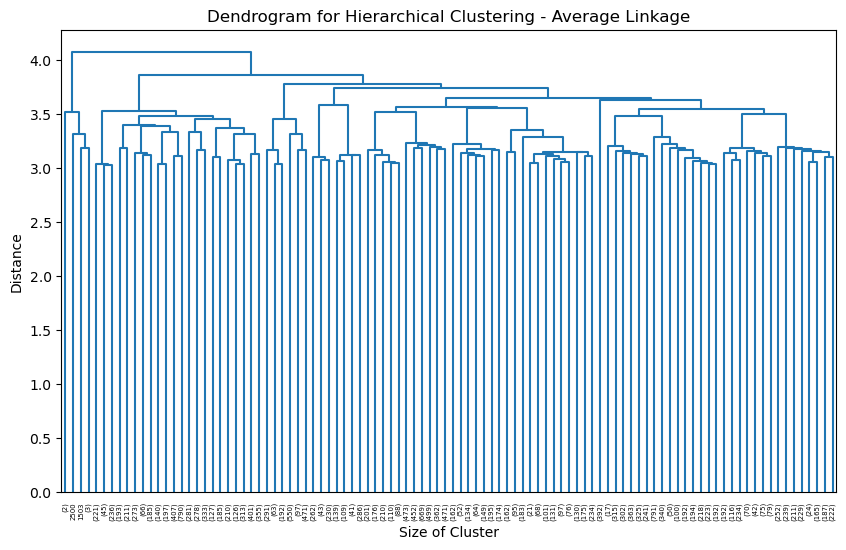

In [32]:
# Look at dendrogram with average linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'average'), truncate_mode = 'lastp', p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering - Average Linkage')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

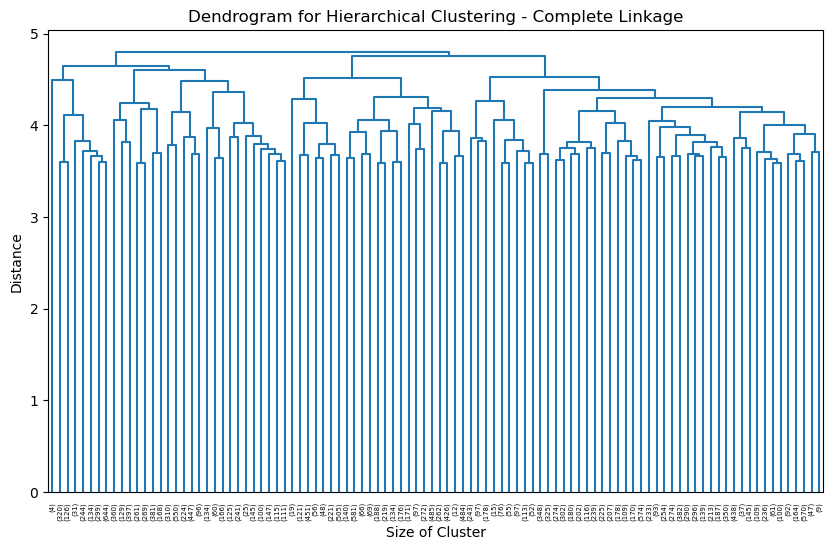

In [33]:
# Look at dendrogram with complete linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'complete'), truncate_mode = 'lastp', p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering - Complete Linkage')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

In [34]:
# print(dendrogram_complete['color_list'])

In [35]:
# unique_colors = set(dendrogram_complete['color_list'])
# print(unique_colors)

In [36]:
# optimal_number_of_clusters = len(unique_colors)
# print(optimal_number_of_clusters)

In [37]:
# clusters = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
# label = clusters.fit_predict(df_mm)

In [38]:
# label_values = pd.Series(label,index=df_mm.index)
# df_mm['c_clusters'] = label_values.values

In [39]:
# df_mm.c_clusters.value_counts()

In [40]:
# # ridge plots by variable
# x_var = "month_num"

# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
# palette = sns.color_palette("flare", 12)
# g = sns.FacetGrid(df_mm, palette=palette, row="clusters", hue="clusters", aspect=9, height=1.2)
# g.map_dataframe(sns.kdeplot, x=x_var, fill=True, alpha=1)
# g.map_dataframe(sns.kdeplot, x=x_var, color='black')
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, color='black', fontsize=13,
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, x_var)
# g.fig.subplots_adjust(hspace=-.5)
# g.set_titles("")
# g.set(yticks=[], xlabel="Year Built (scaled)")
# g.despine( left=True)

### k-Means Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
import matplotlib.style as style

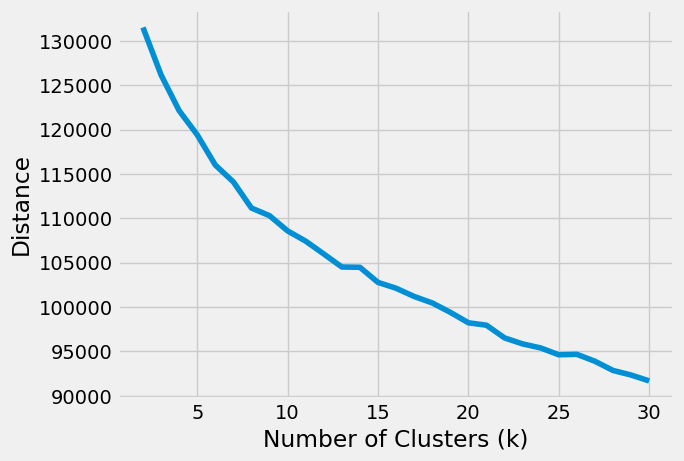

In [43]:
avg_distance=[]
k_list = list(range(2, 31))

for n_clusters in k_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(df_mm)
    avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(k_list, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

In [44]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

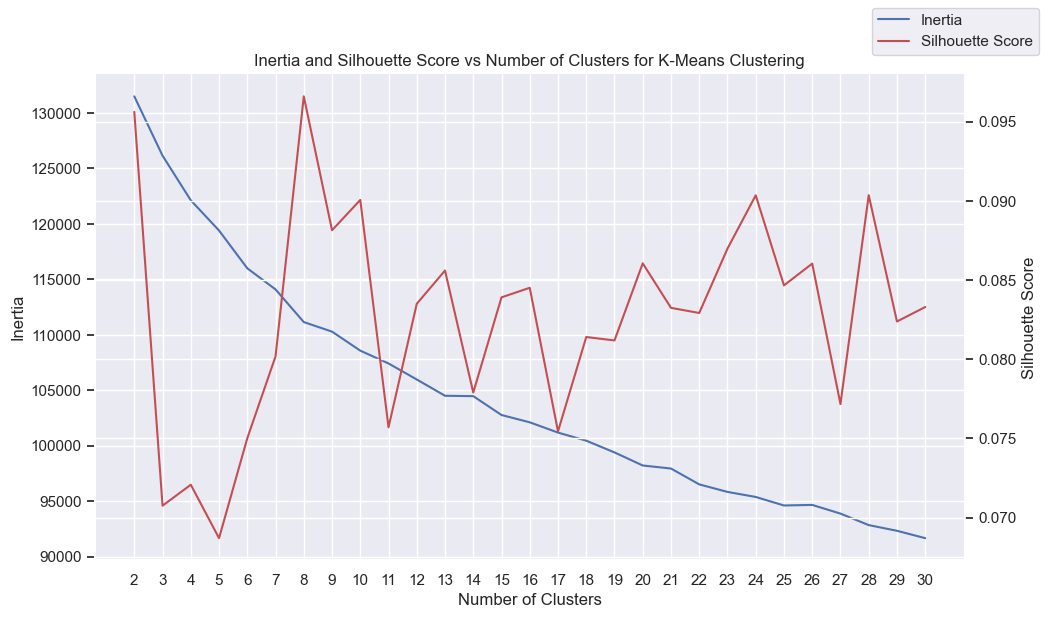

In [45]:
# Perform k-means clustering (minmax scaling) for different numbers of clusters, calculate the inertia and silhouette score for each number of clusters, and
# plot inertia and silhouette score vs number of clusters

inertias_minmax = []
silhouettes_minmax = []
k_list = list(range(2, 31))

for k in k_list:
    kmeans_minmax = KMeans(n_clusters = k, random_state = 0).fit(df_scaled)
    inertias_minmax.append(kmeans_minmax.inertia_)
    silhouettes_minmax.append(silhouette_score(df_mm, kmeans_minmax.labels_, random_state = 0))
    
sns.set_theme()
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = k_list, y = inertias_minmax, label = 'Inertia', legend = False)
sns.despine()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
ax2 = ax.twinx()
sns.lineplot(x = k_list, y = silhouettes_minmax, ax = ax2, label = 'Silhouette Score', color = 'r', legend = False)
sns.despine(right = False)
plt.ylabel('Silhouette Score')
ax.figure.legend()
plt.title('Inertia and Silhouette Score vs Number of Clusters for K-Means Clustering')
plt.xticks(k_list)
plt.show()

In [46]:
# # Use KElbowVisualizer to display elbow curve
# from yellowbrick.cluster import KElbowVisualizer
# kmeans = KMeans(n_clusters = k, random_state = 0)
# visualizer = KElbowVisualizer(kmeans, k = (2, 31), timings= True)
# visualizer.fit(df)
# visualizer.show()

In [47]:
# # build the clustering model
# kmeans = KMeans(n_clusters=14)
# kmeans.fit(df_mm)

In [48]:
# label = kmeans.fit_predict(df_mm)
# kmeans.cluster_centers_

In [49]:
# label_values = pd.Series(label,index=df_mm.index)
# df_mm['clusters'] = label_values.values

In [50]:
# Perform k-means clustering (minmax scaling) with n clusters, and look at value counts for each cluster
kmeans_minmax = KMeans(n_clusters = 4, random_state = 0).fit(df_mm)
df_kmeans_minmax = pd.concat([df, pd.DataFrame({'cluster': kmeans_minmax.labels_}, index = df.index)], axis = 1)
df_kmeans_minmax['cluster'].value_counts()

2    7625
1    7016
0    3575
3    2844
Name: cluster, dtype: int64

In [51]:
df_kmeans_minmax.to_csv(output + '\df_kmeans_minmax_removed_duplicate_cols_&_over_predictors_Jan2023_4_clusters.csv')

df_kmeans_minmax

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month,community_name,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded,cluster
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,January,SOUTH CHICAGO,Far Southeast Side,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,January,ROSELAND,Far Southeast Side,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,January,EDGEWATER,Far North Side,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,January,NEAR WEST SIDE,West Side,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,2023-01-31,STREET,712,7,16.0,68.0,2023,41.789901,-87.652336,99.0,87.0,0.0,25.0,14.00,3.02,7.52,1412 S Blue Island Ave\n,0.382933,Tuesday,Weekday,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
21056,2023-01-31,STREET,2223,22,21.0,73.0,2023,41.726029,-87.639694,33.0,75.0,0.0,25.0,14.00,3.02,7.52,7808 S Halsted St,0.323412,Tuesday,Weekday,January,WASHINGTON HEIGHTS,Far Southwest Side,8763.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1
21057,2023-01-31,VEHICLE NON-COMMERCIAL,922,9,15.0,58.0,2023,41.811395,-87.693078,52.0,77.0,0.0,25.0,14.00,3.02,7.52,2150 N California Ave,0.431175,Tuesday,Weekday,January,BRIGHTON PARK,Southwest Side,16563.60,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
21058,2023-01-31,RESIDENCE - GARAGE,632,6,9.0,44.0,2023,41.733814,-87.611099,109.0,93.0,0.0,25.0,14.00,3.02,7.52,7040 S Cottage Grove Ave,0.383236,Tuesday,Weekday,January,CHATHAM,Far Southeast Side,10749.15,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1


In [52]:
df_kmeans_minmax['new_col'] = range(1, len(df_kmeans_minmax) + 1)
df_kmeans_minmax

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month,community_name,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded,cluster,new_col
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,January,SOUTH CHICAGO,Far Southeast Side,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,January,ROSELAND,Far Southeast Side,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,January,EDGEWATER,Far North Side,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,4
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,January,NEAR WEST SIDE,West Side,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,2023-01-31,STREET,712,7,16.0,68.0,2023,41.789901,-87.652336,99.0,87.0,0.0,25.0,14.00,3.02,7.52,1412 S Blue Island Ave\n,0.382933,Tuesday,Weekday,January,ENGLEWOOD,Southwest Side,7937.79,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,21056
21056,2023-01-31,STREET,2223,22,21.0,73.0,2023,41.726029,-87.639694,33.0,75.0,0.0,25.0,14.00,3.02,7.52,7808 S Halsted St,0.323412,Tuesday,Weekday,January,WASHINGTON HEIGHTS,Far Southwest Side,8763.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1,21057
21057,2023-01-31,VEHICLE NON-COMMERCIAL,922,9,15.0,58.0,2023,41.811395,-87.693078,52.0,77.0,0.0,25.0,14.00,3.02,7.52,2150 N California Ave,0.431175,Tuesday,Weekday,January,BRIGHTON PARK,Southwest Side,16563.60,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,21058
21058,2023-01-31,RESIDENCE - GARAGE,632,6,9.0,44.0,2023,41.733814,-87.611099,109.0,93.0,0.0,25.0,14.00,3.02,7.52,7040 S Cottage Grove Ave,0.383236,Tuesday,Weekday,January,CHATHAM,Far Southeast Side,10749.15,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,21059


In [53]:
table = pd.pivot_table(df_kmeans_minmax, values='new_col', index=['crime_category_encoded'],
                       columns=['cluster'], aggfunc="count")

table

cluster,0,1,2,3
crime_category_encoded,,,,
0,547,1022,1222,380
1,1391,2561,2658,1041
2,1637,3433,3745,1423


In [54]:
table = pd.pivot_table(df_kmeans_minmax, values='new_col', index=['regional_community'],
                       columns=['cluster'], aggfunc="count")

table

cluster,0,1,2,3
regional_community,,,,
Central,324.0,292.0,910.0,267.0
Far North Side,330.0,NaN,1556.0,278.0
Far Southeast Side,468.0,1796.0,NaN,331.0
Far Southwest Side,222.0,954.0,1.0,183.0
North Side,231.0,NaN,993.0,211.0
Northwest Side,204.0,NaN,842.0,161.0
South Side,565.0,2218.0,NaN,395.0
Southwest Side,428.0,1756.0,NaN,347.0
West Side,803.0,NaN,3323.0,671.0


In [55]:
df_kmeans_minmax_filter = df_kmeans_minmax[(df_kmeans_minmax.latitude > -99) & (df_kmeans_minmax.longitude > -99)]

In [56]:
df_kmeans_minmax_filter.describe()

,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station_distance,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded,cluster,new_col
count,21053.000000,21053.000000,21053.000000,21053.000000,21053.0,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000,21053.0,21053.000000,21053.000000,21053.000000,21053.000000,21053.000000
mean,1141.941861,11.191612,23.078611,36.614544,2023.0,41.843814,-87.667756,38.725122,166.632546,2.132209,6.426448,38.305515,28.116256,32.855652,0.508668,15551.003891,0.002327,0.013015,0.176649,0.337767,0.098656,0.009072,0.302380,0.270175,0.127868,0.232223,0.254406,0.018382,0.277015,0.074716,0.032299,0.0,0.166675,0.080749,1.335629,1.462594,10532.831853
std,711.302091,7.111404,14.140021,21.440346,0.0,0.087886,0.060587,32.939085,136.374826,5.452493,13.953492,8.558544,8.699131,8.082539,0.797773,8187.959106,0.048189,0.113340,0.482352,1.315027,0.421948,0.115176,1.885964,0.785680,0.425964,1.111486,0.674704,0.159547,0.621685,0.306174,0.208142,0.0,0.711998,0.317691,0.723983,0.926416,6078.404530
min,111.000000,1.000000,1.000000,1.000000,2023.0,41.645288,-87.939733,0.000000,7.000000,0.000000,0.000000,14.000000,3.020000,7.520000,0.001674,1005.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,524.000000,5.000000,9.000000,22.000000,2023.0,41.766437,-87.710307,14.000000,77.000000,0.000000,0.000000,33.080000,24.980000,28.760000,0.190635,9411.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,5270.000000
50%,1024.000000,10.000000,24.000000,32.000000,2023.0,41.860265,-87.660506,23.000000,102.000000,0.000000,0.000000,37.040000,28.940000,32.720000,0.336645,13504.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,10533.000000
75%,1724.000000,17.000000,34.000000,53.000000,2023.0,41.908431,-87.625817,59.000000,245.000000,1.000000,0.000000,44.960000,35.060000,38.120000,0.561357,19166.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,15796.000000
max,2535.000000,31.000000,50.000000,77.000000,2023.0,42.022536,-87.524652,127.000000,567.000000,28.400000,51.000000,53.060000,39.920000,45.500000,11.908632,38496.720000,1.000000,1.000000,4.000000,30.000000,5.000000,4.000000,30.000000,17.000000,5.000000,25.000000,13.000000,4.000000,6.000000,3.000000,3.000000,0.0,9.000000,3.000000,2.000000,3.000000,21060.000000


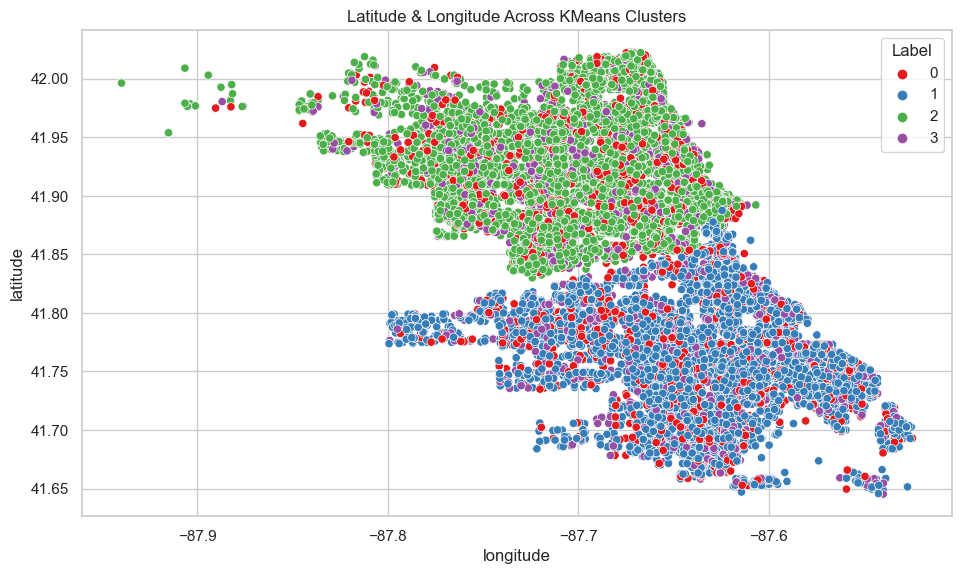

In [57]:
palette = 'Set1'

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue='cluster', palette=palette, data=df_kmeans_minmax_filter)
plt.title('Latitude & Longitude Across KMeans Clusters')
plt.legend(title='Label')
plt.show()